In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
np.random.seed(0)

In [3]:
data = pd.read_csv("res_completo.csv", index_col=0)

# Separación del conjunto de datos en entrenamiento y test
# Separar el 20% para el test
# estratificar de acuerdo con dec_fav_denunciante

X_train, X_test, Y_train, Y_test = train_test_split(data.drop("dec_fav_denunciante", 
                                                            axis=1),
                                                    data["dec_fav_denunciante"],
                                                    test_size=0.2,
                                                    stratify=data["dec_fav_denunciante"],
                                                    random_state=0)

print("training set size: ", X_train.shape[0])
print("test set size: ", X_test.shape[0])

training set size:  227
test set size:  57


In [4]:
test_size = 57
p_df = 0.68
Y_test = Y_test.values.reshape((1, test_size))

## Clasificador aleatorio que utiliza las probabilidades a priori

Se desea analizar la distribución del accuracy en el conjunto de datos de prueba de un clasificador aleatorio que utilize las probabilidades a priori

$ P(Y=1) = 0.68 $

$ P(Y=0) = 0.32 $

Para esto se generan 10000 predicciones aleatorias para el conjunto de datos de prueba y se analiza esta distribución.

Probabilidad de que el accuracy sea mayor a 0.754: 0.0012


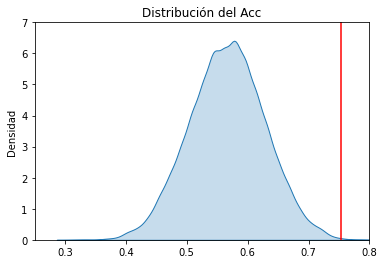

In [5]:
random_predictions = np.random.binomial(1, p=p_df, size=(10000, test_size))
accuracies_vector = (random_predictions == Y_test).mean(axis=1)

p_value = (accuracies_vector >= 0.754).mean()

print(f"Probabilidad de que el accuracy sea mayor a 0.754: {p_value}")

fig, axis = plt.subplots(1)
axis.set_xlim(0.25, 0.8)
axis.set_ylim(0, 7)
plt.vlines(x=0.754, ymin=0, ymax=10, color="red")
sns.kdeplot(x=accuracies_vector, ax=axis, fill=True);

plt.title("Distribución del Acc");
plt.ylabel("Densidad");

## Clasificador aleatorio

Se desea analizar la distribución del accuracy en el conjunto de datos de prueba de un clasificador aleatorio

$ P(Y=1) = 0.5 $

$ P(Y=0) = 0.5 $

Para esto se generan 10000 predicciones aleatorias para el conjunto de datos de prueba y se analiza esta distribución.

Probabilidad de que el accuracy sea mayor a 0.754: 0.0002


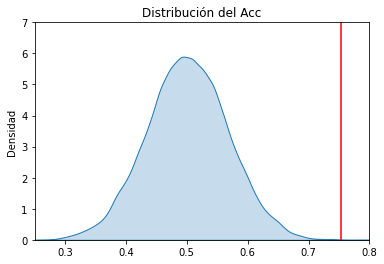

In [13]:
random_predictions = np.random.binomial(1, p=0.5, size=(10000, test_size))
accuracies_vector = (random_predictions == Y_test).mean(axis=1)

p_value = (accuracies_vector >= 0.754).mean()

print(f"Probabilidad de que el accuracy sea mayor a 0.754: {p_value}")

fig, axis = plt.subplots(1)
axis.set_xlim(0.25, 0.8)
axis.set_ylim(0, 7)
plt.vlines(x=0.754, ymin=0, ymax=10, color="red")
sns.kdeplot(x=accuracies_vector, ax=axis, fill=True);

plt.title("Distribución del Acc");
plt.ylabel("Densidad");